In [18]:
# Notebook Monte-Carlo sur le nombre de Candidats

In [ ]:
# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  
import random as rd
import math
%matplotlib inline  

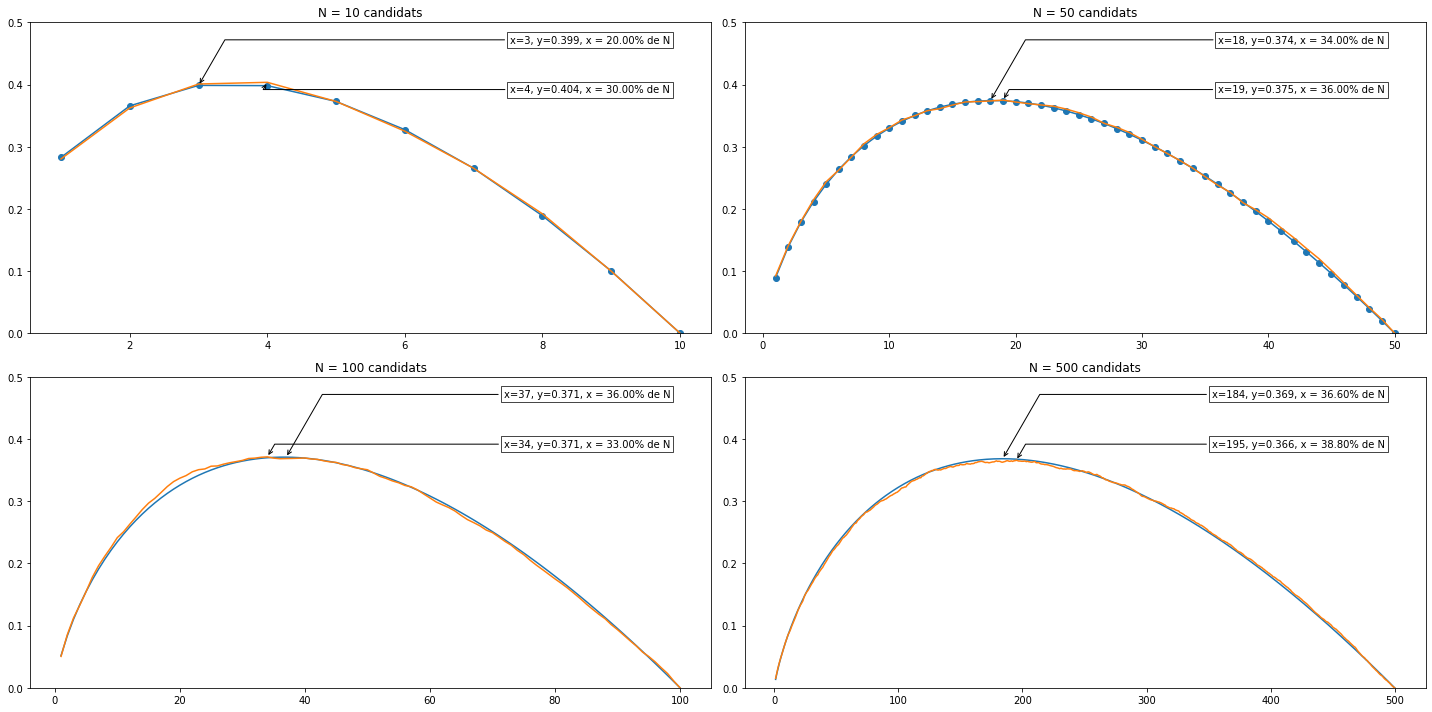

<Figure size 2880x2880 with 0 Axes>

In [104]:
#3
def annot_max(x,y, ax, coord):
    xmax = np.argmax(y)
    ymax = max(y)
    text= "x={:.0f}, y={:.3f}, x = {:.2f}% de N".format(xmax+1, ymax, 100*xmax/(len(y)))
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax+1, ymax), xytext=coord, **kw)

#TEORIQUE
def p_nk(k, N):
    if k==0:
        return 0
    else:
        return k/N * sum([1/i for i in range(k, N)])

def graph(N, g):
    v = [p_nk(i, N) for i in range(1,N+1)]
    annot_max(range(1,N+1), v, g, (0.94,0.96))
    if(N<=50):
        g.plot(range(1,N+1),v,'-o')
    else:
        g.plot(range(1,N+1),v)
    return
    
#MONTE CARLO
def sim(N,k,x):
    comp = min(x[0:k])
    #print(x[0:k], comp)
    l=-1
    for i in range(k,N):
        if(comp!= 1 and x[i]<comp):
            l = i
            break
    #print(l)
    
    if(l!=-1 and x[l]==1):
        return True, l+1
    else:
        return False, -1
    
def run(N,Num):
    s = [0]*(N+1)
    for i in range(0,Num):
        x = [*range(1,N+1)]
        rd.shuffle(x)
        for k in range(1,N+1):
            if(sim(N,k,x)[0]):
                s[k]+=1
    return [t/Num for t in s[1:]]

#Assemble
def assm(N,Num, g):
    #theorique
    graph(N,g)
    #monte carlo
    v = run(N,Num)
    g.plot(range(1,N+1), v)
    annot_max(range(1,N+1), v, g, (0.94,0.80))
    return


fig, ax = plt.subplots(2,2)
fig = plt.figure(figsize=(40,40))
fig.suptitle('Num', fontsize=16)

plt.rcParams["figure.figsize"] = [20, 10]
#plt.rcParams["figure.autolayout"] = True

plt.setp(ax, ylim=(0,0.5))

ax[0][0].title.set_text('N = 10 candidats')
ax[0][1].title.set_text('N = 50 candidats')
ax[1][0].title.set_text('N = 100 candidats')
ax[1][1].title.set_text('N = 500 candidats')

sims = 10000
assm(10,sims,ax[0][0])
assm(50,sims,ax[0][1])
assm(100,sims,ax[1][0])
assm(500,sims,ax[1][1])

fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.savefig('results.png')
plt.show()
